## Manually Set number of Confounding Variables

In [1]:
num_confound = 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from collections import defaultdict

In [3]:
combined_data = pd.read_csv('../data/intermediates/pre_acpca1.csv')
# pop = pd.read_csv('../data/raw/counties_05-08.csv').filter(['FIPS', 'POP_ESTIMATE_2018'])
# print(pop.head())
# combined_data = combined_data.merge(pop, left_on='FIPS', right_on='FIPS')
# combined_data.dropna()
# combined_data['normalized_deaths'] = np.true_divide(combined_data['Deaths'],combined_data['POP_ESTIMATE_2018'])
combined_data.set_index('FIPS', inplace=True)
print(combined_data.shape)
combined_data.head()

(211, 21)


,baseline,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Mar Temp AVG / F,Apr Temp AVG / F,May Temp AVG / F,...,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,HospCt,Deaths,normalized_deaths
FIPS,,,,,,,,,,,,,,,,,,,,,
1055.0,0.411541,0.116127,0.25,0.361022,0.123984,0.135802,0.321642,0.697723,0.721448,0.778049,...,0.203494,0.325792,0.294336,0.358494,0.567540,0.362510,0.075155,0.258374,0.020576,0.119644
1081.0,0.260364,0.138024,0.25,0.169329,0.457317,0.104938,0.390932,0.757764,0.743733,0.802439,...,0.056305,0.343891,0.586319,0.144048,0.571650,0.451833,0.609583,0.046170,0.082305,0.193068
1095.0,0.483091,0.097183,0.50,0.476038,0.154472,0.092593,0.344739,0.672878,0.696379,0.768293,...,0.162744,0.334842,0.241579,0.364819,0.680389,0.659251,0.086210,0.278906,0.012346,0.100503
1097.0,0.419447,0.202669,0.00,0.306709,0.229675,0.172840,0.299401,0.846791,0.813370,0.865854,...,0.145504,0.303167,0.505194,0.328976,0.607318,0.520245,0.119985,0.102618,0.144033,0.118461
1101.0,0.281413,0.175975,0.00,0.325879,0.416667,0.129630,0.402908,0.792961,0.782730,0.848780,...,0.123487,0.271493,0.275549,0.385057,0.597948,0.570767,0.176654,0.159904,0.012346,0.036609


          PC1         PC2        PC3        PC4       PC5       PC6       PC7  \
0 -411.534167 -290.672277  28.517476  14.656374  7.732382  3.941972  3.712403   

        PC8      PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.456616  2.15278  1.888729  1.639108  1.184422  1.147581  0.114687   

       PC15      PC16      PC17  
0  0.304477  0.463221  0.504405  
[28.51747575 14.65637392  7.73238209  3.94197248  3.71240287  2.4566158
  2.15277992]
17


<BarContainer object of 17 artists>

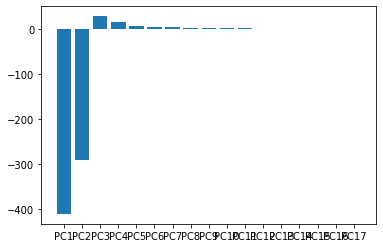

In [4]:
eigens = pd.read_csv('../data/intermediates/eigenvalues_ind.csv')
print(eigens.head())
eigs = eigens.to_numpy()
positive_eigs = eigs[eigs > 2]
print(positive_eigs)
# total_pcs = len(positive_eigs)
_, total_pcs = eigs.shape
print(total_pcs )
# print(eigens.loc[0,eigens.columns.values[0:]])
# labels = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(eigens.columns.values[0:], eigens.loc[0,eigens.columns.values[0:]]) 

In [5]:
# eigen_d = pd.read_csv('../data/intermediates/eigenvalues_d.csv')
# print(eigen_d.head())

In [6]:
# sigs = pd.read_csv('../data/intermediates/sigs_ind.csv')
# print(sigs.head())
# plt.bar(sigs.columns.values, sigs.loc[0,])

In [7]:
PCs = pd.read_csv('../data/intermediates/PCs_ind.csv')
# if 'Unnamed: 0' in PCs.columns.values: 
#     PCs.drop(columns='Unnamed: 0')
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.494573,-0.525747,-0.215661,-0.241632,-0.410120,0.261336,-0.064692,-0.205811,0.177376,-0.044356,-0.178383,-0.116076,0.073027,0.012158,-0.047775,0.066711,0.010769
1,-0.198498,-0.107539,0.059678,0.450202,0.224216,0.033857,0.187020,0.315495,0.395369,0.094478,0.021258,-0.210300,0.412813,-0.026359,-0.082697,0.162123,-0.377764
2,0.591543,0.054107,-0.100506,-0.042341,-0.276341,0.270664,0.108527,-0.236555,0.418104,-0.209802,0.344676,-0.257138,0.051061,0.025981,-0.027778,0.096790,-0.026895
3,-0.025953,-0.205709,-0.060670,0.173667,0.193556,0.065876,-0.050471,-0.085196,0.186735,-0.027231,0.113059,0.335171,-0.673988,-0.028653,0.051710,0.431967,-0.257828
4,-0.146634,0.518005,0.137410,-0.260731,-0.412255,0.305942,0.212045,0.376137,0.122930,0.189697,-0.129512,0.160221,-0.153213,-0.042774,0.037411,0.096083,-0.209364


### Lambda=20

In [8]:
# acpca_data_ = pd.read_csv('../data/intermediates/post_acpca_d.csv')
# print(acpca_data_deaths.head())
# acpca_arr_deaths = acpca_data_deaths.to_numpy()
# acpca_arr_deaths

acpca_data_ind = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_data_ind.head()
acpca_arr_ind = acpca_data_ind.to_numpy()
# acpca_arr_ind

In [9]:
acpca_data = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_arr_ind = acpca_data.to_numpy()
acpca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.343467,0.150468,-0.528951,0.037238,0.146975,-0.108285,0.058452,0.042406,-0.011171,0.022676,0.006139,-0.084397,0.009073,-0.013646,-0.040109,-0.001693,0.029135
1,0.201599,0.054642,-0.723590,0.147896,-0.175375,0.214584,-0.065017,0.082484,-0.126762,0.104865,-0.144362,0.057518,0.060709,0.023574,0.020993,-0.001959,0.040979
2,-0.536850,0.072722,-0.486210,0.153028,-0.007217,0.072836,0.112305,-0.055349,0.008371,-0.148302,-0.023688,-0.062914,0.161158,-0.006439,0.011267,0.017530,-0.010356
3,-0.113186,0.391454,-0.671302,0.259867,0.166591,-0.058475,-0.091006,-0.060903,-0.071609,0.070763,-0.011145,0.013556,0.020418,0.034037,-0.009959,-0.008611,-0.025259
4,-0.036999,0.415008,-0.622939,0.185490,0.068476,-0.022053,0.161501,-0.058524,-0.035284,-0.073861,0.048376,-0.011470,0.059418,0.023888,0.004152,0.032046,-0.054899


In [10]:
# plt.plot(list(acpca_data_ind['PC1'].values), list(acpca_data_deaths['PC1'].values), 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('deaths PC')

In [11]:
# num_pcs = 14
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

In [12]:
# num_pcs = 1
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

## Regression on individual components

PC:  0
deaths corr score 0.07022047311577095
mobility corr score 0.08687333517905382
PC:  1
deaths corr score 0.007643998524655694
mobility corr score 0.14166027576156237
PC:  2
deaths corr score 0.020081397627320308
mobility corr score 8.783111703170032e-05
PC:  3
deaths corr score 0.0033649637658542675
mobility corr score 3.505073480747356e-05
PC:  4
deaths corr score 0.002794312451627534
mobility corr score 1.1258299844052466e-05
PC:  5
deaths corr score 0.0016069449473771202
mobility corr score 6.059898627341909e-08
PC:  6
deaths corr score 0.04967914203958656
mobility corr score 3.6217811780758775e-06
PC:  7
deaths corr score 0.010026803299773901
mobility corr score 7.792651287141794e-06
PC:  8
deaths corr score 0.0015530822173948078
mobility corr score 3.039015385897237e-06
PC:  9
deaths corr score 0.06869516187995006
mobility corr score 2.6441171984137313e-06
PC:  10
deaths corr score 5.0529475423610755e-05
mobility corr score 7.522645056656786e-06
PC:  11
deaths corr score 2.52

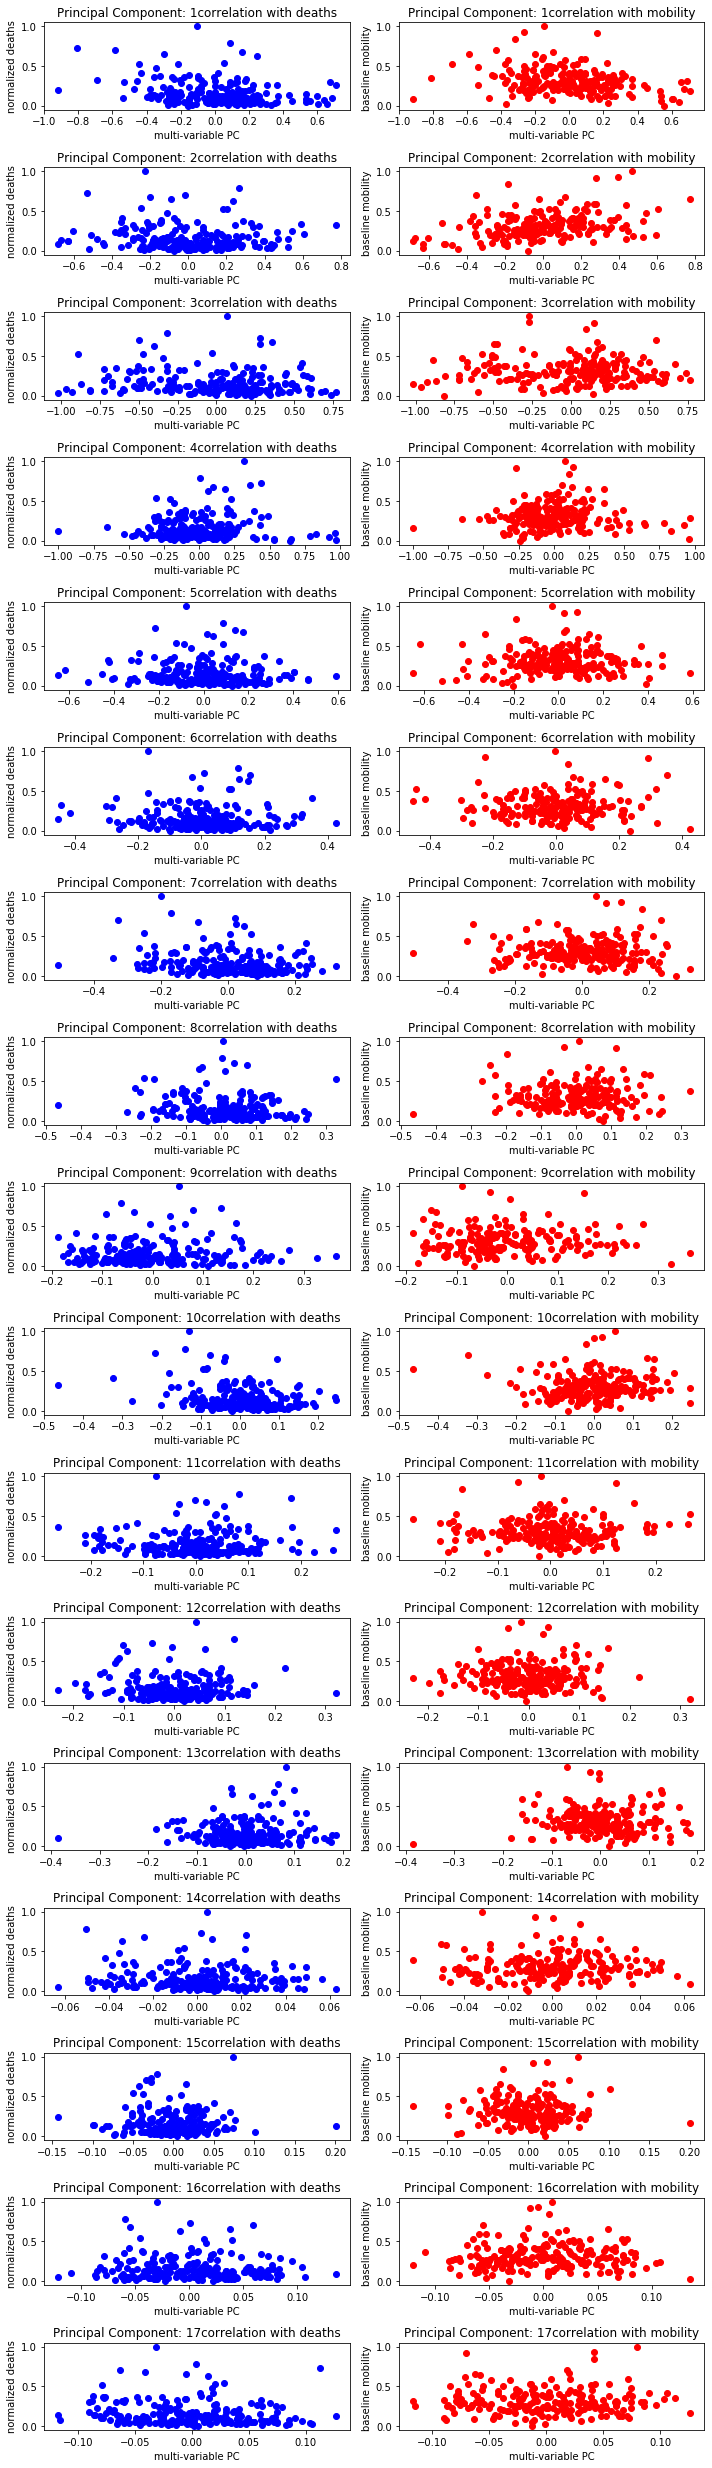

In [13]:
scores = {}
plt.figure(figsize=(10,40))
target_pcs = 0

for pc in range(total_pcs): 
    print('PC: ', pc)
    X = acpca_arr_ind[:,pc]
    (r,) = X.shape
#     print(X.shape)
    X = X.reshape(r,1)
#     print(X.shape)
    Y = combined_data['normalized_deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    
    print("deaths corr score", score)
    plt.subplot(20,2,2*pc+1)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('normalized deaths')
    plt.title('Principal Component: ' + str(pc+1) + 'correlation with deaths')
    
    m = combined_data['baseline']
   
    reg_mob = lm.LinearRegression().fit(X,m)
    m_score = reg_mob.score(X,m)
    print('mobility corr score', m_score)
    plt.subplot(20,2,2*pc+2)
    plt.plot(X, m, 'ro')
    plt.xlabel('multi-variable PC')
    plt.ylabel('baseline mobility ')
    plt.title('Principal Component: ' + str(pc+1) + 'correlation with mobility')
    if m_score < score: 
        target_pcs += 1
        scores[pc] = score
# pc = 17    
# X = acpca_arr_ind[:,pc]
# (r,) = X.shape
# #     print(X.shape)
# X = X.reshape(r,1)
# print(X.shape)
# Y = combined_data['normalized_deaths']
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# score = reg.score(X,Y)
# scores[pc] = score
# print("deaths corr score", score)
# plt.subplot(20,2,2*pc+1)
# plt.tight_layout()
# plt.plot(X, Y, 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('normalized deaths')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with deaths')

# m = combined_data['baseline']
# reg_mob = lm.LinearRegression().fit(X,m)
# print('mobility corr score', reg_mob.score(X,m))
# plt.subplot(20,2,2*pc+2)
# plt.plot(X, m, 'ro')
# plt.xlabel('multi-variable PC')
# plt.ylabel('baseline mobility ')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with mobility')

## Sort PCs by regression scores

In [14]:
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: -item[1])}
for pc, score in scores.items():
    print(pc, score)

9 0.06869516187995006
6 0.04967914203958656
16 0.02736093283401353
2 0.020081397627320308
7 0.010026803299773901
13 0.006664100446597043
3 0.0033649637658542675
4 0.002794312451627534
12 0.002140240404432392
5 0.0016069449473771202
8 0.0015530822173948078
15 0.0006915782596884634
14 0.00031119772587751005
10 5.0529475423610755e-05
11 2.5234314175004432e-05


## Regression on multiple compnents

PCs: [10]
0.06869516187995006
[-0.42953346] 


PCs: [10  7]
0.11830158983562254
[-0.42930615 -0.26070243] 


PCs: [10  7 17]
0.14555438623139916
[-0.42900067 -0.26067525 -0.52430534] 


PCs: [10  7 17  3]
0.16598546165429817
[-0.43005018 -0.2605016  -0.52508422 -0.06002258] 


PCs: [10  7 17  3  8]
0.17583810990954785
[-0.42979842 -0.26036256 -0.52495521 -0.05998329 -0.14272123] 


PCs: [10  7 17  3  8 14]
0.1824505958151379
[-0.42976846 -0.26032794 -0.52494564 -0.05995715 -0.14264862 -0.54167038] 


PCs: [10  7 17  3  8 14  4]
0.18560421944731298
[-0.42962408 -0.26019631 -0.52488827 -0.059873   -0.14236828 -0.5412667
  0.03299567] 


PCs: [10  7 17  3  8 14  4  5]
0.18855320379848184
[-0.4297509  -0.26027866 -0.52494932 -0.0599074  -0.14254884 -0.54151345
  0.0331171  -0.04400367] 


PCs: [10  7 17  3  8 14  4  5 13]
0.190727956256733
[-0.42967964 -0.26030229 -0.52489264 -0.05997109 -0.14258541 -0.54160138
  0.03315569 -0.04397657  0.0981674 ] 


PCs: [10  7 17  3  8 14  4  5 13  6]
0

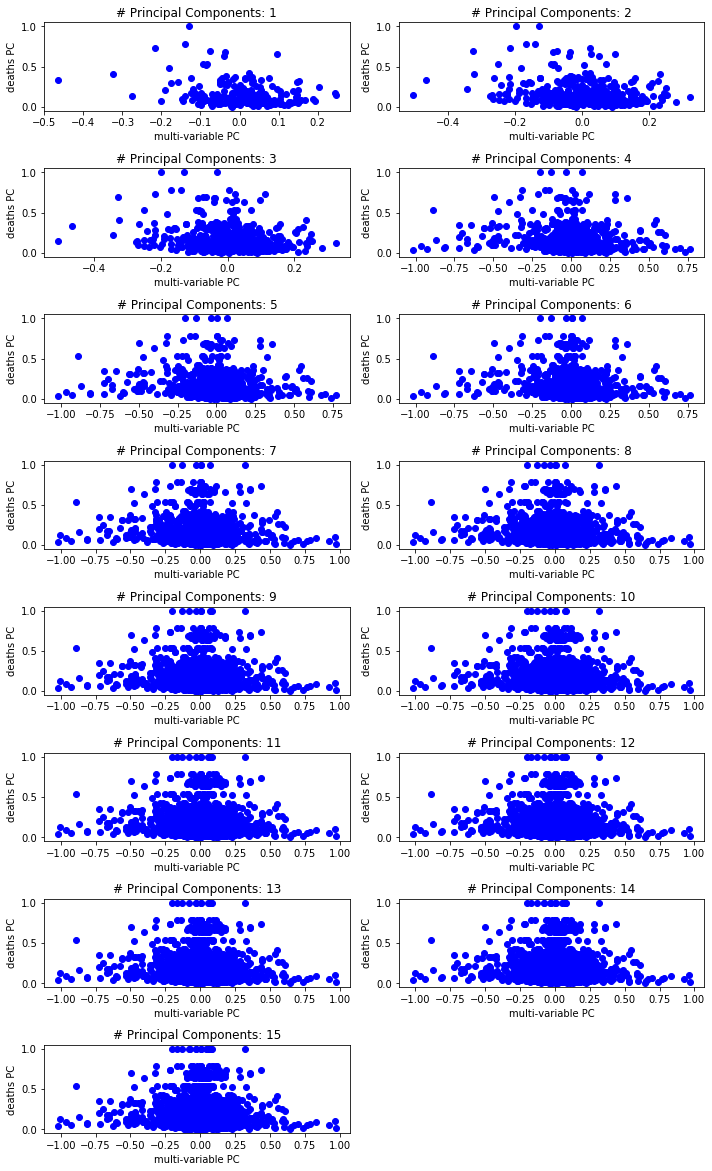

In [15]:
# Get list of PCs that are most correlated with # deaths
# Add PCs to LR model one by one in order of highest to lowest regression scores
Y = combined_data['normalized_deaths']
plt.figure(figsize=(10,20))
# num_pcs = 5

for num_pcs in range(1, target_pcs+1): 
    inds_pcs = list(scores.keys())[:num_pcs] # indices of top num_pcs most correlated PCs
    print('PCs:', np.array(inds_pcs)+1)
    X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
#     Y = combined_data['Deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    print(score)
    print(reg.coef_, '\n\n')
    plt.subplot(10,2,num_pcs)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('deaths PC')
    plt.title('# Principal Components: ' + str(num_pcs))
    

## Assign coefficients of LR model to PCs

In [16]:
inds_pcs = list(scores.keys())[:target_pcs] # indices of top num_pcs most correlated PCs
print('PCs:', np.array(inds_pcs)+1)
X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
# Y = combined_data['Deaths']
Y = combined_data['normalized_deaths']
#     print(Y.shape)
reg = lm.LinearRegression().fit(X,Y)
score = reg.score(X,Y)
print(score)
print(reg.coef_, '\n\n')
coeffs = {}
for i in range(len(inds_pcs)): 
    coeffs[inds_pcs[i]] = reg.coef_[i]
    print(inds_pcs[i]+1, reg.coef_[i])

PCs: [10  7 17  3  8 14  4  5 13  6  9 16 15 11 12]
0.19485063594370844
[-0.42946433 -0.26024316 -0.52476318 -0.06000847 -0.14243815 -0.54144394
  0.03307282 -0.04406087  0.09815006 -0.04488955  0.05934989 -0.08702578
 -0.07154183 -0.01307139 -0.00813541] 


10 -0.4294643301739397
7 -0.2602431637357325
17 -0.5247631782863031
3 -0.060008474845814314
8 -0.14243815410766913
14 -0.5414439403586933
4 0.033072817447714946
5 -0.04406086598886203
13 0.09815005778633601
6 -0.0448895547997462
9 0.05934988981463211
16 -0.08702577651656482
15 -0.07154182524136464
11 -0.013071387479653303
12 -0.008135410633139056


## Print PCs in order of regression scores
#### print values in PCs in order of highest to lowest absolute value of loadings 
#### For each variable, calculate a sum of the product of the weights in each PC multiplied by the coefficient corresponding to the PC 

In [17]:
weights = {}
r,c = PCs.shape
for j in range(target_pcs): 
    pc = list(scores.keys())[j] + 1
    eig = eigens.loc[0, 'PC' + str(pc)]
    if eig < 0: 
        continue
    print('Principal Component', str(pc))
    print('eigenvalue: ', eig)
    PC_dict = {}
    # PC9 = [-0.190896056547888, 0.468236937317933,-0.228567222005448,0.408002822993487,0.0535105125245226,0.407238079363182,0.181820228133276,0.366604933989350,0.435246581102968]
    for i in range(r): 
    #     print('{0:<80} \t {1:>0.3f}'.format(combined_data.columns.values[i+2], PC9[i]))
        loading = PCs.loc[i,'PC' + str(pc)] # weight of variable in component
        variable = combined_data.columns.values[i+num_confound] # variable name in column headers 
        PC_dict[variable] = loading
        coef = coeffs[pc-1] # coefficient corresponding to PC
        if variable not in weights:
            weights[variable] = 0
        weights[variable] += coef * loading
    PC_dict = {k: v for k, v in sorted(PC_dict.items(), key=lambda item: -abs(item[1]))}
    for k, v in PC_dict.items():
        print('{0:<100} \t {1:>0.3f}'.format(k, v))
    print('\n\n\n')

Principal Component 10
eigenvalue:  1.8887290501825715
HospCt                                                                                               	 -0.520
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)         	 -0.419
Mar Temp AVG / F                                                                                     	 0.406
Jun Temp AVG / F                                                                                     	 -0.346
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool          	 0.302
Percent of adults with a bachelor's degree or higher 2014-18                                         	 -0.210
Med_HH_Income_Percent_of_State_Total_2018                                                            	 0.190
Total_age65plus                                                                                      	 0.163
Total households!!Average household size                             

In [18]:
for var, weight in weights.items():
    print('{0:<100} & {1:>0.4f} \\\\ \hline'.format(var.replace('_', '\\_'), weight))

Rural-urban\_Continuum Code\_2013                                                                    & 0.0828 \\ \hline
Percent of adults with less than a high school diploma 2014-18                                       & 0.1355 \\ \hline
Percent of adults with a bachelor's degree or higher 2014-18                                         & 0.1212 \\ \hline
Unemployment\_rate\_2018                                                                             & 0.0851 \\ \hline
Med\_HH\_Income\_Percent\_of\_State\_Total\_2018                                                     & -0.0880 \\ \hline
Mar Temp AVG / F                                                                                     & -0.2893 \\ \hline
Apr Temp AVG / F                                                                                     & 0.5160 \\ \hline
May Temp AVG / F                                                                                     & -0.2971 \\ \hline
Jun Temp AVG / F                     

In [19]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = acpca_arr_ind[:,0:num_pcs+1]
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Components: ' + str(num_pcs+1))

In [20]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = np.abs(acpca_arr_ind[:,0:num_pcs+1])
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Component: ' + str(pc+1))